### Importing the libraries

In [2]:
import json
import spacy
import progressbar
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

import operator

In [3]:
nlp = spacy.load('en')

### Reading the questions and annotations files.

In [4]:
ques_open = json.load(open('Questions_Val_mscoco/OpenEnded_mscoco_val2014_questions.json', 'r'))
anno = json.load(open('Annotations_Val_mscoco/mscoco_val2014_annotations.json', 'r'))

Accessing the all questions as a list of dictionaries.

In [5]:
questions_open = ques_open['questions']
annotations = anno['annotations']

In [6]:
print("Number of open ended questions :  ", len(questions_open))
print("Number of annotations :  ", len(annotations))

Number of open ended questions :   121512
Number of annotations :   121512


Let's display the first question and its corresponding annotation.

In [8]:
print(questions_open[0])
print(annotations[0])

{'question': 'What is the table made of?', 'image_id': 350623, 'question_id': 3506232}
{'question_type': 'what is the', 'multiple_choice_answer': 'wood', 'answers': [{'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'wood', 'answer_confidence': 'maybe', 'answer_id': 8}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'wood', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 350623, 'answer_type': 'other', 'question_id': 3506232}


As you can see in multiple choice questions a question has 10 possible answers in context of the image_id 350623 among which one answer is true for that image.

This is the format used for annotating the data. For more details you can refer to the following link: https://visualqa.org/vqa_v1_download.html

Now we will try to display the image with image_id as 350623 i.e. first question.

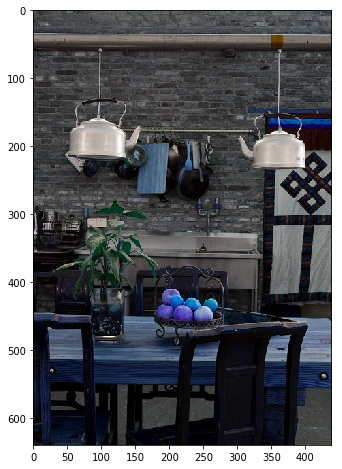

In [9]:
image = cv2.imread('val2014/val2014/COCO_val2014_000000350623.jpg')
plt.figure(figsize=(20,8))
plt.imshow(image)
plt.show()

In [36]:
# Opening all .txt files to dump the extracted data
image_set_id = open('Preprocessed data/images_id.txt','wb')
ques_compile = open('Preprocessed data/ques.txt', 'wb')
ques_id = open('Preprocessed data/ques_id.txt', 'wb')
ques_len = open('Preprocessed data/ques_len.txt', 'wb')
answer_train = open('Preprocessed data/answer.txt','wb')

In [37]:
# A progress bar is typically used to display the progress of a long running operation
progress = progressbar.ProgressBar()

In [1]:
def most_freq_answer(values):
    ans_dict = {}
    for index in range(10):
        ans_dict[values[index]['answer']] = 1
    for index in range(10):
        ans_dict[values[index]['answer']] += 1
    return max(ans_dict.items(), key = operator.itemgetter(1))[0]

In [39]:
for index, q in progress(zip(range(len(questions_open)),questions_open)):
    ques_compile.write((q['question'] + '\n').encode('utf8'))
    ques_len.write((str(len(nlp(q['question']))) + '\n').encode('utf8'))
    ques_id.write((str(q['question_id'])+'\n').encode('utf8'))
    image_set_id.write((str(q['image_id'])+'\n').encode('utf8'))
    answer_train.write(most_freq_answer(annotations[index]['answers']).encode('utf8'))
    answer_train.write('\n'.encode('utf8'))

| | #                                            | 121511 Elapsed Time: 0:26:13
